In [1]:
%matplotlib inline

In [2]:
import os
import sqlite3
import datetime
import warnings

import pandas

import tokio.tools.common

In [3]:
DATE_START = datetime.datetime(2019, 1, 1)
DATE_END = datetime.datetime(2020, 1, 1) - datetime.timedelta(days=1)

INDEX_PATH = "/global/cfs/cdirs/pma/www/daily/%Y-%m-%d/darshanlogs-cori.db"

In [4]:
to_df = {
    "date": [],
    "cpuhours": []
}
db_filenames = tokio.tools.common.enumerate_dated_files(
    start=DATE_START,
    end=DATE_END,
    template=INDEX_PATH)

for db_filename in db_filenames:
    conn = sqlite3.connect(db_filename)
    date = db_filename.strip(os.sep).split(os.sep)[-2]
    try:
        row = next(conn.execute("select sum(nprocs * walltime / 3600.0) as cpuhrs from headers"))
    except sqlite3.OperationalError:
        warnings.warn("file for {} is invalid".format(date))
        conn.close()
        continue
    conn.close()
    to_df['date'].append(datetime.datetime.strptime(date, "%Y-%m-%d"))
    to_df['cpuhours'].append(row[0])

/global/homes/g/glock/.conda/envs/pytokio-prod/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: file for 2019-09-04 is invalid
  app.launch_new_instance()
/global/homes/g/glock/.conda/envs/pytokio-prod/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: file for 2019-12-04 is invalid
  app.launch_new_instance()
/global/homes/g/glock/.conda/envs/pytokio-prod/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: file for 2019-12-15 is invalid
  app.launch_new_instance()
/global/homes/g/glock/.conda/envs/pytokio-prod/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: file for 2019-12-18 is invalid
  app.launch_new_instance()
/global/homes/g/glock/.conda/envs/pytokio-prod/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: file for 2019-12-21 is invalid
  app.launch_new_instance()
/global/homes/g/glock/.conda/envs/pytokio-prod/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: file for 2019-12-28 i

In [5]:
dataframe = pandas.DataFrame.from_dict(to_df).set_index('date')

In [6]:
output_filename = "darshan_coverage-cpuhrs_vs_date_{}-{}.csv".format(
    DATE_START.strftime("%Y-%m-%d"),
    DATE_END.strftime("%Y-%m-%d"))
dataframe.to_csv(output_filename)
print("Saved output to {}".format(output_filename))

Saved output to darshan_coverage-cpuhrs_vs_date_2019-01-01-2019-12-31.csv


Text(0.5, 1.0, 'mean=2.64M/day')

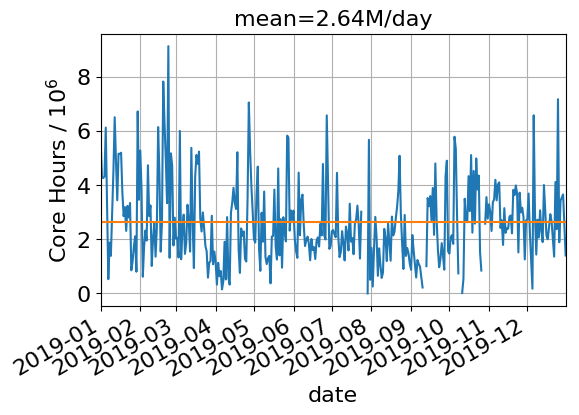

In [7]:
plot_df = dataframe / 1e6
ax = plot_df.plot()
ax.set_ylabel("Core Hours / $10^6$")
ax.grid()
ax.get_legend().set_visible(False)
ax.plot(ax.get_xlim(),
        [plot_df.mean()] * 2)
ax.set_title("mean={:.2f}M/day".format(plot_df.mean()[0]), fontsize="medium")